### Import libraries and modules

In [1]:
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

### MNIST Dataset reading

In [2]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = tf.keras.datasets.mnist.load_data()

### Data treatment

In [3]:
#data normalize
x_train_raw = x_train_raw.astype('float32') / 255.0
x_test = x_test_raw.astype('float32') / 255.0
#adding grayscale channel
x_train_raw = np.expand_dims(x_train_raw, -1)
x_test = np.expand_dims(x_test, -1)
#categorical labels
y_train = to_categorical(y_train_raw)
y_test = to_categorical(y_test_raw)
#data quantity assigment
x_train = x_train_raw[1:60000,:,:,:] 
y_train = y_train[1:60000,:]

### Construction of the neural network

In [8]:
def BuildModel():
    
    #Sequential NN creation w/ 1 dense hidden layer
    model = Sequential([
        Flatten(),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(10, activation='softmax')
    ])

    optimizer = SGD(learning_rate=0.1)
    
    model.compile(
        loss = 'mse',
        optimizer = optimizer,
        metrics = ['accuracy'] 
    )
    
    return model

In [9]:
model = BuildModel()

### Model Trainning

In [10]:
history = model.fit(
    x_train, y_train,
    epochs = 20
)

model.summary()

Epoch 1/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0869 - accuracy: 0.2050
Epoch 2/20
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0464 - accuracy: 0.6906
Epoch 3/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0237 - accuracy: 0.8542
Epoch 4/20
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0189 - accuracy: 0.8793
Epoch 5/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0166 - accuracy: 0.8941
Epoch 6/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0153 - accuracy: 0.9010
Epoch 7/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0141 - accuracy: 0.9102
Epoch 8/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0133 - accuracy: 0.9149
Epoch 9/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0130 - accuracy: 0.9167
Epoch 10/20
1875/1875 [==============================] - 27s 15m

### Accuracy vs. Epochs Graph 

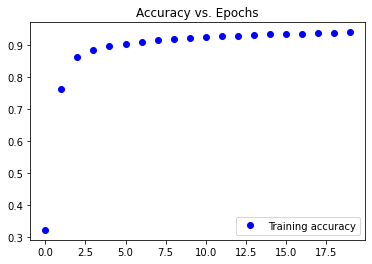

In [11]:
acc = history.history['accuracy']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()

### Loss vs. Epochs Graph

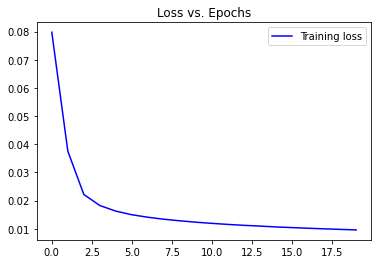

In [12]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

### Model test

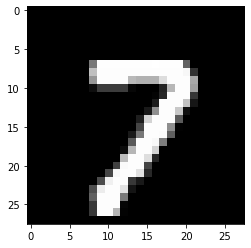

In [13]:
#We select 1 random image of the test dataset (10.000 images)
image = random.choice(x_test_raw)
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

In [14]:
#Data normalize and Property vector
image = (image.reshape((1, 28, 28, 1))).astype('float32') / 255.0
model.predict(image)[0]

array([3.0977223e-08, 1.9961326e-09, 2.6732778e-06, 3.4761569e-04,
       1.7166688e-10, 2.4073179e-09, 1.6222630e-16, 9.9950099e-01,
       1.6281078e-06, 1.4713402e-04], dtype=float32)

In [15]:
#Predict
digit = np.argmax(model.predict(image)[0], axis=-1)
print("Prediction: ", digit)

#Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Prediction:  7
Test loss: 0.010391566902399063
Test accuracy: 0.9337999820709229
